In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier


In [2]:
train_path = r"C:\Users\18138\Desktop\data anly\Training Image sp 23"

In [3]:
train_clsname = [name for name in os.listdir(train_path) if os.path.isdir(os.path.join(train_path, name))]

In [4]:
img_size = 128

In [5]:
# intialize the training data
train_data = [] 
label = 0
while label < len(train_clsname):
    category = train_clsname[label]
    print(label)
    print(category)
    path = os.path.join(train_path, category)
    img_name_index = 0
    while img_name_index < len(os.listdir(path)):
        img_name = os.listdir(path)[img_name_index]
        img_path = os.path.join(path, img_name)
        if img_name.lower().endswith(('.jpg', '.jpeg', '.png', '.gif')):
            img_arr = cv2.imread(img_path, cv2.IMREAD_COLOR)
            img_arr = cv2.resize(img_arr, (img_size, img_size))
            train_data.append([img_arr, label])
        img_name_index += 1
    label += 1

0
Adult
1
Airplane
2
Alpaca
3
Bird
4
Bus
5
Car
6
Cat
7
Child
8
Elephant
9
Flower
10
Giraffe
11
Horse
12
Monkey
13
Panda
14
Reptile
15
Vessel


In [6]:
random.shuffle(train_data)

In [7]:
train_data, valid_data = train_test_split(train_data, test_size=0.2, random_state=42)

In [8]:
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))

In [9]:
train_features = []
train_labels = []
for img, label in train_data:
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    features = vgg16.predict(img)
    features = np.reshape(features, (-1,))
    train_features.append(features)
    train_labels.append(label)

valid_features = []
valid_labels = []
for img, label in valid_data:
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    features = vgg16.predict(img)
    features = np.reshape(features, (-1,))
    valid_features.append(features)
    valid_labels.append(label)


1/1 [==============================] - 0s 54ms/step


1/1 [==============================] - 0s 55ms/step


1/1 [==============================] - 0s 48ms/step


1/1 [==============================] - 0s 50ms/step


1/1 [==============================] - 0s 60ms/step


1/1 [==============================] - 0s 53ms/step


1/1 [==============================] - 0s 49ms/step


1/1 [==============================] - 0s 55ms/step


1/1 [==============================] - 0s 50ms/step


1/1 [==============================] - 0s 62ms/step


1/1 [==============================] - 0s 71ms/step


1/1 [==============================] - 0s 52ms/step


In [10]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
params = rfc.get_params()
params

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [11]:
clf=RandomForestClassifier(n_estimators=100,max_depth = 10,verbose= 0,random_state=42)
clf.fit(train_features, train_labels)
params = rfc.get_params()

In [12]:
valid_pred = clf.predict(valid_features)
valid_acc = accuracy_score(valid_labels, valid_pred)

In [13]:
print(f"Validation accuracy: {valid_acc}")

Validation accuracy: 0.8016304347826086


In [14]:
print(classification_report(valid_labels, valid_pred))

              precision    recall  f1-score   support

           0       0.64      0.70      0.67        23
           1       0.83      0.91      0.87        22
           2       0.86      0.55      0.67        22
           3       0.95      0.75      0.84        24
           4       0.61      0.95      0.74        21
           5       0.88      0.58      0.70        26
           6       0.89      0.93      0.91        27
           7       0.50      0.40      0.44        15
           8       0.91      0.88      0.89        24
           9       0.76      0.93      0.83        27
          10       1.00      0.87      0.93        23
          11       0.86      0.90      0.88        20
          12       0.88      0.88      0.88        26
          13       0.83      1.00      0.91        29
          14       0.75      0.63      0.69        19
          15       0.68      0.75      0.71        20

    accuracy                           0.80       368
   macro avg       0.80   

In [15]:
import joblib
joblib.dump(clf, 'rfc_classifier_model.pkl')

['rfc_classifier_model.pkl']

In [16]:
clf = joblib.load('rfc_classifier_model.pkl')

In [17]:
test_path = r"C:\Users\18138\Desktop\data anly\Test Image sp 23"

In [18]:
test_clsname = [name for name in os.listdir(test_path) if os.path.isdir(os.path.join(test_path, name))]

In [19]:
img_size = 128

In [20]:
# initialize the test data
test_data = [] 
label = 0
while label < len(test_clsname):
    category = test_clsname[label]
    print(label)
    print(category)
    path = os.path.join(test_path, category)
    img_name_index = 0
    while img_name_index < len(os.listdir(path)):
        img_name = os.listdir(path)[img_name_index]
        img_path = os.path.join(path, img_name)
        if img_name.lower().endswith(('.jpg', '.jpeg', '.png', '.gif')):
            img_arr = cv2.imread(img_path, cv2.IMREAD_COLOR)
            img_arr = cv2.resize(img_arr, (img_size, img_size))
            test_data.append([img_arr, label,img_name])
        img_name_index += 1
    label += 1

0
Adult
1
Airplane
2
Alpaca
3
Bird
4
Bus
5
Car
6
Cat
7
Child
8
Elephant
9
Flower
10
Giraffe
11
Horse
12
Monkey
13
Panda
14
Reptile
15
Vessel


In [21]:
random.shuffle(test_data)

In [22]:
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))

In [23]:
test_features = []
test_labels = []
for img, label,img_name in test_data:
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    features = vgg16.predict(img)
    features = np.reshape(features, (-1,))
    test_features.append(features)
    test_labels.append(label)

1/1 [==============================] - 0s 54ms/step


1/1 [==============================] - 0s 59ms/step


1/1 [==============================] - 0s 67ms/step


1/1 [==============================] - 0s 80ms/step


In [24]:
test_pred = clf.predict(test_features)
test_acc = accuracy_score(test_labels, test_pred)
print(f"test accuracy: {test_acc}")

test accuracy: 0.8229166666666666


In [25]:
print(classification_report(test_labels,test_pred))

              precision    recall  f1-score   support

           0       0.65      0.67      0.66        30
           1       0.97      0.97      0.97        30
           2       0.88      0.50      0.64        30
           3       0.96      0.73      0.83        30
           4       0.88      1.00      0.94        30
           5       1.00      0.93      0.97        30
           6       0.77      0.80      0.79        30
           7       0.63      0.57      0.60        30
           8       0.77      0.90      0.83        30
           9       0.86      1.00      0.92        30
          10       0.86      0.80      0.83        30
          11       0.69      0.80      0.74        30
          12       0.69      0.73      0.71        30
          13       0.82      0.90      0.86        30
          14       0.96      0.87      0.91        30
          15       0.88      1.00      0.94        30

    accuracy                           0.82       480
   macro avg       0.83   

In [26]:
test_pred

array([11,  2,  6,  1, 10, 15, 11, 12,  9,  4,  8,  2, 10,  1,  2,  5, 14,
        2, 14, 11, 10,  9,  5,  8,  9,  5, 12, 11,  6, 15, 14,  8, 15,  1,
        5,  8, 13,  6,  1,  9,  5,  9,  1,  9, 10,  4,  8, 13,  0,  6, 13,
       12, 15,  1,  2, 10, 13,  8,  1, 15,  7,  8, 12, 10,  4, 13, 13,  0,
       13,  4, 13,  8,  9,  5, 13,  5,  1,  0,  6,  6,  5, 12, 14, 15, 12,
        8,  0,  4, 10, 14, 11,  3, 10, 15, 12,  1,  3,  7,  8,  9, 12,  3,
        3,  2,  2, 14, 11,  7,  5,  8,  7,  0,  1,  0, 11, 10,  5,  7, 11,
        8, 10, 12, 11,  1, 13,  6,  3,  8,  4, 10,  7, 14,  7,  0, 10,  7,
       14, 10, 11, 10, 15,  7,  5, 15,  6, 14,  8, 10,  8,  1, 12, 11,  4,
        5, 10, 11,  1,  3, 15,  7,  8,  6,  8, 10, 13,  3,  6,  2,  4,  8,
        8, 11,  7, 12, 10, 11, 13,  0,  6, 15, 15, 14, 13,  8, 12,  9, 15,
        9,  4,  9, 14,  9,  9, 13,  9,  3,  3, 12,  3, 14,  9,  3,  5, 15,
        0, 14,  6,  4, 15,  7,  9, 11, 12, 13,  8, 12, 14,  6,  1,  7, 13,
        8, 15,  9,  7,  3

In [27]:
test_label=[i[1] for i in test_data]
print(test_label)

[2, 2, 3, 1, 10, 15, 11, 3, 0, 4, 8, 2, 2, 1, 2, 5, 14, 2, 14, 11, 10, 9, 5, 2, 9, 5, 12, 11, 6, 2, 14, 8, 15, 1, 5, 8, 13, 11, 1, 9, 5, 9, 1, 9, 10, 4, 8, 13, 0, 6, 13, 14, 15, 1, 2, 10, 11, 8, 1, 12, 7, 10, 12, 10, 4, 13, 13, 7, 13, 4, 13, 8, 9, 5, 13, 5, 1, 0, 6, 0, 5, 12, 14, 15, 3, 8, 7, 4, 10, 14, 2, 3, 10, 15, 3, 1, 3, 7, 8, 9, 12, 3, 3, 2, 2, 14, 11, 0, 5, 8, 7, 0, 1, 0, 2, 10, 5, 10, 11, 8, 10, 12, 2, 3, 13, 6, 3, 11, 4, 10, 7, 14, 7, 7, 10, 0, 14, 10, 11, 10, 15, 0, 5, 15, 6, 14, 8, 10, 8, 1, 14, 10, 4, 5, 10, 2, 1, 3, 15, 7, 8, 6, 8, 14, 13, 3, 6, 2, 4, 8, 12, 2, 7, 2, 10, 11, 6, 0, 6, 15, 15, 14, 13, 8, 12, 9, 15, 9, 4, 9, 14, 9, 9, 13, 9, 3, 3, 12, 3, 14, 9, 3, 5, 15, 0, 14, 6, 13, 15, 7, 9, 11, 12, 13, 8, 12, 14, 6, 1, 7, 13, 8, 15, 9, 7, 3, 3, 12, 6, 7, 0, 0, 2, 15, 6, 0, 0, 1, 2, 15, 13, 10, 4, 4, 10, 4, 1, 5, 7, 9, 6, 8, 6, 11, 15, 12, 4, 6, 10, 15, 3, 4, 5, 15, 10, 6, 12, 8, 5, 14, 11, 4, 1, 11, 9, 11, 8, 12, 5, 1, 8, 12, 4, 14, 9, 3, 8, 13, 15, 8, 6, 15, 15, 7, 7, 14

In [28]:
test_imgname=[i[2] for i in test_data]
print(test_imgname)

['test_alpaca (13).jpg', 'test_alpaca (10).jpg', 'test_bird (29).jpg', 'test_airplane (29).jpg', 'test_giraffe (9).jpg', 'test_vessel (6).jpg', 'test_horse (29).jpg', 'test_bird (24).jpg', 'test_adult (3).jpg', 'test_bus (23).jpg', 'test_elephant (19).jpg', 'test_alpaca (2).jpg', 'test_alpaca (17).jpg', 'test_airplane (16).jpg', 'test_alpaca (22).jpg', 'test_car (27).jpg', 'test_reptile (17).jpg', 'test_alpaca (25).jpg', 'test_reptile (16).jpg', 'test_horse (15).jpeg', 'test_giraffe (17).jpg', 'test_flower (10).jpg', 'test_car (15).jpg', 'test_alpaca (29).jpg', 'test_flower (14).jpg', 'test_car (14).jpg', 'test_monkey (19).jpg', 'test_horse (22).jpg', 'test_cat (7).jpg', 'test_alpaca (1).jpg', 'test_reptile (23).jpg', 'test_elephant (27).jpg', 'test_vessel (17).jpg', 'test_airplane (28).jpg', 'test_car (28).jpg', 'test_elephant (7).jpg', 'test_panda (23).jpg', 'test_horse (2).jpeg', 'test_airplane (21).jpg', 'test_flower (26).jpg', 'test_car (6).jpg', 'test_flower (25).jpg', 'test_airp

In [29]:
data = {'GIVEN TEST IMG': test_imgname, 'GIVEN TEST CLASS': test_label, 'PREDICTED CLASS': test_pred}
df = pd.DataFrame(data)
df.to_csv("RFC_pretrained.csv", index=False)

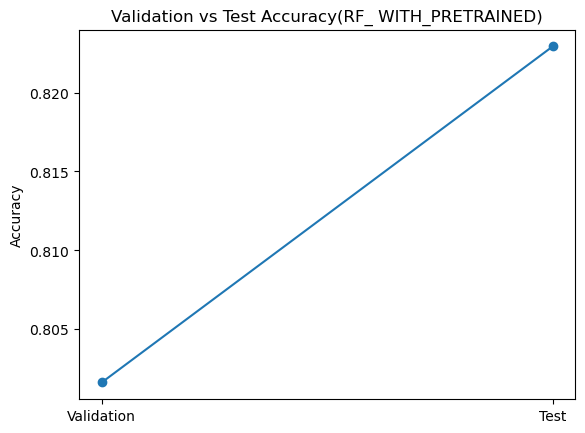

In [30]:
import matplotlib.pyplot as plt

plt.plot([1, 2], [valid_acc, test_acc], marker='o')
plt.xticks([1, 2], ['Validation', 'Test'])
plt.ylabel('Accuracy')
plt.title('Validation vs Test Accuracy(RF_ WITH_PRETRAINED)')
plt.show()

In [31]:
from sklearn.metrics import confusion_matrix
import numpy as np

cm = confusion_matrix(test_labels, test_pred)
print(cm)

[[20  0  0  0  1  0  1  7  0  1  0  0  0  0  0  0]
 [ 1 29  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 15  0  0  0  0  0  3  0  2  8  1  0  0  1]
 [ 0  1  0 22  0  0  1  0  0  0  1  0  4  0  0  1]
 [ 0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2 28  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0 24  1  1  0  0  0  0  3  0  0]
 [ 9  0  0  0  0  0  1 17  0  1  0  0  1  1  0  0]
 [ 0  0  0  0  0  0  0  0 27  2  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 30  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  1  1  0 24  1  1  0  0  1]
 [ 1  0  0  0  0  0  1  0  2  1  0 24  0  1  0  0]
 [ 0  0  2  0  0  0  1  0  1  0  0  1 22  1  1  1]
 [ 0  0  0  0  1  0  0  1  0  0  0  0  1 27  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  1  0  2  0 26  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 30]]
